<a href="https://colab.research.google.com/github/ChacoGolden/Stat-Data-Science/blob/main/Otter_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plan - Roadmap pour tt le monde



* Transposer le travail du mid-term sur le notebook
* Reprendre les remarques du mid-term
* Introduction: Commencer par un contexte, et ajouter findings de la revue littéraire
* Revue biblio
* Présentation de la méthodologie
* Multicollinearity analysis
* EDA des control variables
* Transposer l'équation du sujet
* Tables avec les résultats des régressions (VIF + OLS)
* GROSSE DISCUSSION DE LA CAUSALITE






---



# Introduction

\begin{equation}
\text{Waste}_{i,t} = \beta_0 + \beta_1 \text{Income}_{i,t} + \beta_2 \text{Education}_{i,t} + \beta_3 \text{Household}_{i,t} + \beta_4 \text{Urban}_{i,t} + \beta_5 \text{Age}_{i,t} + \alpha_i + \gamma_t + \varepsilon_{i,t}
\end{equation}

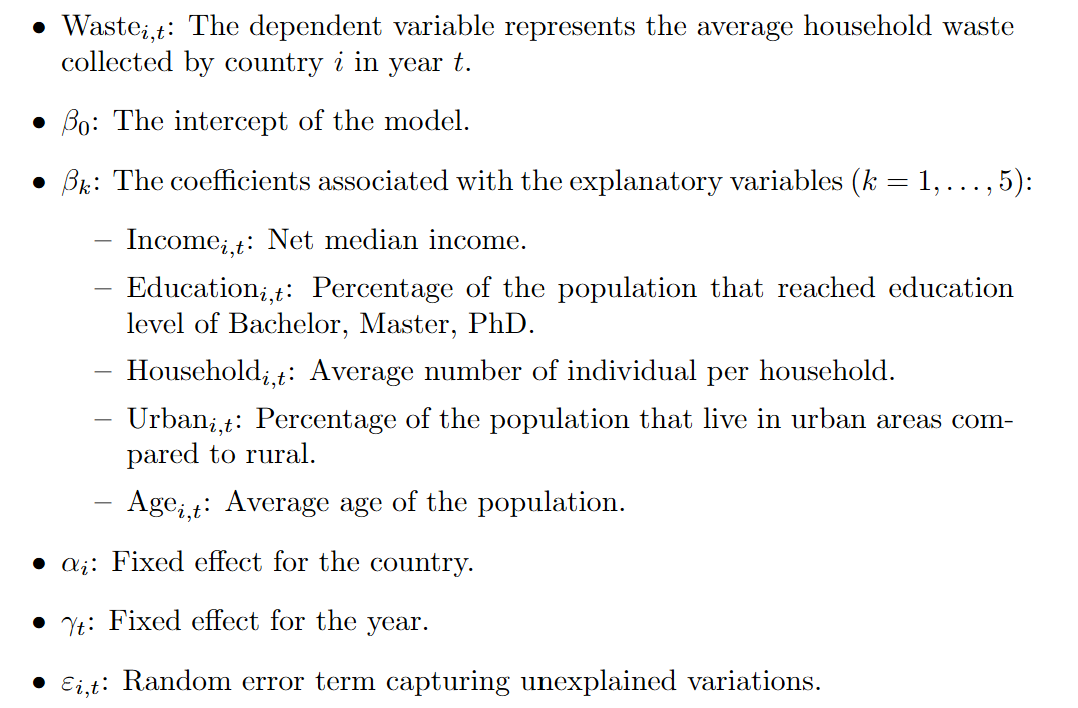

#Country Fixed Effects
These capture country-specific factors that remain constant over time, such as:


*   Institutional difference like government policies
*   Long-Standing cultural attitudes toward waste generation



#Year Fixed Effects
These capture time-specific effects that impact all countries in the same way during a specific year, such as:

Global economic crises.

*   Global economic crisis
*   Advances in waste management technology or practices
*   Internation agreements on environmental standard





# Literature Review

# Methods

In order to evaluate the impacts of the income, through consumption, on the generation of household waste, we used *X*. To control for *Y* due to factors other than *Z*, we included *V*. Furthermore, in order to control for unobservable differences among countries, we used a fixed effects estimator with country and year fixed effects. The
statistical specifications used follow the structure: *EQUATION*, where *W*.

*ajouter une table avec toutes les variables et leurs définitions*

# Materials and Univariate Analysis

# Multicollinearity analysis

# Results

# Discussion



*   Age: les vieux consomment moins + les vieux ont plus tendance à acheter pour les autres
*   Élément de liste



# References